In [68]:
import numpy as np
import dgl
from dgl.dataloading.dataloader import NodeCollator
from dgl.dataloading.pytorch import NodeDataLoader

In [79]:
r_node = np.random.randint(0,20,50)
d_node = np.random.randint(0,20,50)
edge = set(zip(r_node, d_node))

In [81]:
src, dst = tuple(zip(*edge))

In [82]:
g = dgl.DGLGraph()
g.add_nodes(20)

/root/workspace/.venv/lib/python3.8/site-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


In [83]:
g.add_edges(src, dst)

In [84]:
g_b = dgl.to_bidirected(g, copy_ndata=True)

In [107]:
g_r = dgl.reverse(g, copy_ndata=True)

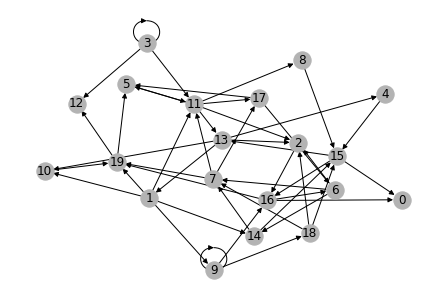

In [85]:
import networkx as nx
nx_G = g.to_networkx()
# 为了图更加美观，我们使用Kamada-Kawaii layout 
pos = nx.kamada_kawai_layout(nx_G)
nx.draw(nx_G, pos, with_labels=True, node_color=[[.7, .7, .7]])

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f52631e75e0>
Traceback (most recent call last):
  File "/root/workspace/.venv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/root/workspace/.venv/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1301, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.8/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/usr/lib/python3.8/multiprocessing/popen_fork.py", line 44, in wait
    if not wait([self.sentinel], timeout):
  File "/usr/lib/python3.8/multiprocessing/connection.py", line 931, in wait
    ready = selector.select(timeout)
  File "/usr/lib/python3.8/selectors.py", line 415, in select
    fd_event_list = self._selector.poll(timeout)
KeyboardInterrupt: 


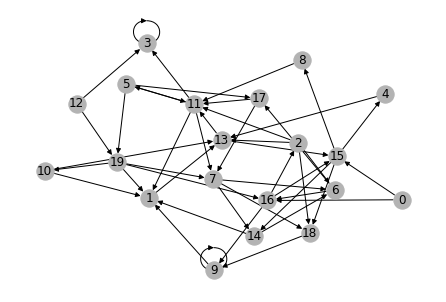

In [108]:
import networkx as nx
nx_G = g_r.to_networkx()
# 为了图更加美观，我们使用Kamada-Kawaii layout 
pos = nx.kamada_kawai_layout(nx_G)
nx.draw(nx_G, pos, with_labels=True, node_color=[[.7, .7, .7]])

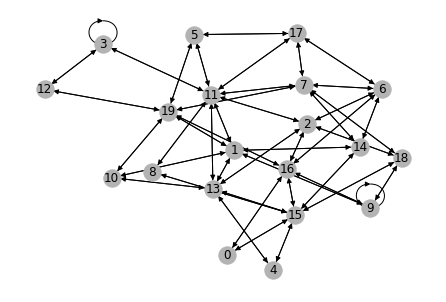

In [86]:
import networkx as nx
nx_G = g_b.to_networkx()
# 为了图更加美观，我们使用Kamada-Kawaii layout 
pos = nx.kamada_kawai_layout(nx_G)
nx.draw(nx_G, pos, with_labels=True, node_color=[[.7, .7, .7]])

In [89]:
from dgl.dataloading.neighbor import MultiLayerNeighborSampler
sampler1 =  MultiLayerNeighborSampler(fanouts=[-1,-1])
train_nid = range(10)
dataloader1 = NodeDataLoader(g_b,
                            train_nid,
                            sampler1,
                            batch_size=2,
                            shuffle=False,
                            drop_last=False,
                            num_workers=4)
for  batch in dataloader1:
    input_nodes, output_nodes, blocks = batch
    print(batch)
    break

[tensor([ 0,  1, 15, 16,  9, 10, 11, 13, 14, 19,  4,  8, 18,  2,  6,  3,  5,  7,
        17, 12]), tensor([0, 1]), [Block(num_src_nodes=20, num_dst_nodes=10, num_edges=52), Block(num_src_nodes=10, num_dst_nodes=2, num_edges=8)]]


In [90]:
dataloader1 = NodeDataLoader(g,
                            train_nid,
                            sampler1,
                            batch_size=2,
                            shuffle=False,
                            drop_last=False,
                            num_workers=4)
for  batch in dataloader1:
    input_nodes, output_nodes, blocks = batch
    print(batch)
    break

[tensor([ 0,  1, 16, 15, 13,  9,  2,  4,  8, 14, 18, 11]), tensor([0, 1]), [Block(num_src_nodes=12, num_dst_nodes=5, num_edges=12), Block(num_src_nodes=5, num_dst_nodes=2, num_edges=3)]]


In [111]:
class MultiLayerInOutSampler(dgl.dataloading.BlockSampler):
    def __init__(self, num_layers, in_fanouts, out_fanouts, return_eids=False, output_ctx=None):
        super().__init__(num_layers, return_eids=return_eids, output_ctx=output_ctx)
        self.in_fanouts = in_fanouts
        self.out_fanouts = out_fanouts

    def sample_frontier(self, block_id, g, seed_nodes):
        in_fanouts, out_fanouts = self.in_fanouts[block_id], self.out_fanouts[block_id]
        in_frontier = dgl.sampling.sample_neighbors(g, seed_nodes, in_fanouts, edge_dir='in')
        out_frontier = dgl.sampling.sample_neighbors(g, seed_nodes, out_fanouts, edge_dir='out')
        print('================ \n')
        print(in_frontier)
        print(out_frontier)
        return in_frontier
    
    def __len__(self):
        return self.num_layers

In [112]:
sampler2 =  MultiLayerInOutSampler(num_layers=2, in_fanouts=[-1,-1], out_fanouts=[-1,-1])
train_nid = range(10)
dataloader2 = NodeDataLoader(g_r,
                            train_nid,
                            sampler2,
                            batch_size=2,
                            shuffle=False,
                            drop_last=False,
                            num_workers=4)
for  batch in dataloader2:
    input_nodes, output_nodes, blocks = batch
    print(batch)
    break



Graph(num_nodes=20, num_edges=4,
      ndata_schemes={}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64)})
Graph(num_nodes=20, num_edges=5,
      ndata_schemes={}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64)})Graph(num_nodes=20, num_edges=5,
      ndata_schemes={}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64)})

Graph(num_nodes=20, num_edges=3,
      ndata_schemes={}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64)})

Graph(num_nodes=20, num_edges=18,
      ndata_schemes={}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64)})


Graph(num_nodes=20, num_edges=2,
      ndata_schemes={}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64)})Graph(num_nodes=20, num_edges=12,
      ndata_schemes={}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64)})Graph(num_nodes=20, num_edges=17,
      ndata_schemes={}
      edata_schemes={'_ID': Scheme(shape=(), dtype=torch.int64)})

Graph(num_nodes=2

In [42]:
from dgl.dataloading.neighbor import MultiLayerNeighborSampler
from dgl.dataloading.pytorch import NodeDataLoader
import random

# print(train_nid)
# train_nid = list(set(train_nid))
# print(train_nid)

In [115]:
class MultiLayerProbsSampler(dgl.dataloading.BlockSampler):
    def __init__(self, probs, max_fanouts, num_layers):
        super().__init__(num_layers)
        self.probs = probs
        self.max_fanouts = max_fanouts

    def sample_frontier(self, block_id, g, seed_nodes, *args, **kwargs):
        max_fanout = self.max_fanouts[block_id]
        prob = self.probs[block_id]

        # 保证边的个数小于
        src, dst = dgl.sampling.sample_neighbors(g, seed_nodes, max_fanout).all_edges()

        # 以概率p随机选择边
        mask = torch.zeros_like(src).bernoulli_(prob)==1
        
        src = src[mask]
        dst = dst[mask]
        # 返回一个与初始图有相同节点的边界
        frontier = dgl.graph((src, dst), num_nodes=g.number_of_nodes())
        return frontier

    def __len__(self):
        return self.num_layers


class MultiLayerFullNeighborSampler(dgl.dataloading.BlockSampler):
    def __init__(self, n_layers):
        super().__init__(n_layers)

    def sample_frontier(self, block_id, g, seed_nodes):
        frontier = dgl.in_subgraph(g, seed_nodes)
        return frontier

In [122]:
sampler1 =  MultiLayerProbsSampler(probs=[0.6,0.6], max_fanouts=[10,10], num_layers=2)
sampler2 =  MultiLayerFullNeighborSampler(2)
sampler3 =  MultiLayerNeighborSampler(fanouts=[30,30])
dataloader1 = NodeDataLoader(g,
                            train_nid,
                            sampler1,
                            batch_size=10,
                            shuffle=False,
                            drop_last=False,
                            num_workers=4)
dataloader2 = NodeDataLoader(g,
                            train_nid,
                            sampler2,
                            batch_size=10,
                            shuffle=False,
                            drop_last=False,
                            num_workers=4)

In [64]:
sampler3 =  MultiLayerInOutSampler(num_layers=2,in_fanouts=[2,2], out_fanouts=[2,2])
dataloader3 = NodeDataLoader(g,
                            train_nid,
                            sampler3,
                            batch_size=5,
                            shuffle=False,
                            drop_last=False,
                            num_workers=4)

In [65]:
for  batch in dataloader3:
    input_nodes, output_nodes, blocks = batch
    print(batch)
    break

[tensor([13, 29,  8, 28, 19,  6, 20, 32, 16, 36, 35, 30, 43, 34, 45, 24,  3,  4,
        21]), tensor([13, 29,  8, 28, 19]), [Block(num_src_nodes=19, num_dst_nodes=12, num_edges=16), Block(num_src_nodes=12, num_dst_nodes=5, num_edges=8)]]


In [48]:
src, dst = dgl.sampling.sample_neighbors(g, range(5), fanout=2, edge_dir='in').all_edges()
frontier = dgl.graph((src, dst), num_nodes=g.number_of_nodes())
frontier

Graph(num_nodes=50, num_edges=8,
      ndata_schemes={}
      edata_schemes={})

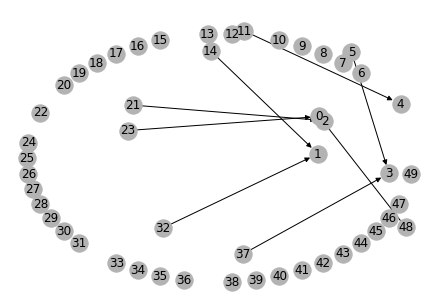

In [49]:
frontier_G = frontier.to_networkx()
# 为了图更加美观，我们使用Kamada-Kawaii layout 
pos = nx.kamada_kawai_layout(frontier_G)
nx.draw(frontier_G, pos, with_labels=True, node_color=[[.7, .7, .7]])

In [56]:
src, dst = dgl.sampling.sample_neighbors(g, range(5), fanout=2, edge_dir='in').all_edges()
frontier = dgl.graph((src, dst), num_nodes=g.number_of_nodes())
frontier

Graph(num_nodes=50, num_edges=8,
      ndata_schemes={}
      edata_schemes={})

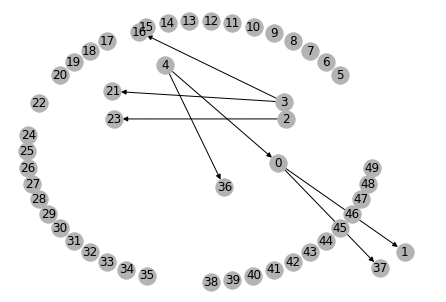

In [51]:
frontier_G = frontier.to_networkx()
# 为了图更加美观，我们使用Kamada-Kawaii layout 
pos = nx.kamada_kawai_layout(frontier_G)
nx.draw(frontier_G, pos, with_labels=True, node_color=[[.7, .7, .7]])

In [123]:
for  batch in dataloader1:
    input_nodes, output_nodes, blocks = batch
    _batch = dataloader2.collator.collate(output_nodes)
    print(batch)
    print('=============')
    print(_batch)
    break

[tensor([27, 22, 12, 25, 10, 45, 15,  9, 42, 14,  8, 46, 39, 28, 36,  1, 18, 31, 40, 19, 26, 30, 37, 20, 11, 29,  6, 49, 23, 34,  7, 21,  0,  2, 24,
         5,  3, 47,  4, 44, 41, 13, 17]), tensor([27, 22, 12, 25, 10, 45, 15,  9, 42, 14]), [Block(num_src_nodes=43, num_dst_nodes=26, num_edges=71), Block(num_src_nodes=26, num_dst_nodes=10, num_edges=19)]]
(tensor([27, 22, 12, 25, 10, 45, 15,  9, 42, 14,  6,  8, 46, 31, 39, 49, 20, 23, 28, 36,  1, 18, 40, 19, 34,  5,  7, 26, 30, 37, 41,  2, 11, 21, 29,
        43,  0, 24, 38,  3, 17, 32, 33, 44, 35, 47,  4, 16, 13]), tensor([27, 22, 12, 25, 10, 45, 15,  9, 42, 14]), [Block(num_src_nodes=49, num_dst_nodes=35, num_edges=144), Block(num_src_nodes=35, num_dst_nodes=10, num_edges=36)])


In [ ]:
# for  batch in dataloader2:
#     input_nodes, output_nodes, blocks = batch
#     _batch = dataloader2.collator.collate(output_nodes)
#     print(batch, _batch, output_nodes)
#     break

In [13]:
# for input_nodes, seeds, blocks in dataloader:
#     print(input_nodes, seeds, blocks)
#     break

tensor([27, 22, 12, 25, 10, 45, 15,  9, 42, 14, 39, 36, 40, 34, 20, 30, 29, 18,
        19, 37, 49,  3, 24, 31,  8, 23, 26,  2, 46, 13,  4, 47, 43, 28]) tensor([27, 22, 12, 25, 10, 45, 15,  9, 42, 14]) [Block(num_src_nodes=34, num_dst_nodes=24, num_edges=47), Block(num_src_nodes=24, num_dst_nodes=17, num_edges=17), Block(num_src_nodes=17, num_dst_nodes=10, num_edges=10)]


In [14]:
import torch

In [15]:
blocks = sampler.sample_blocks(g,torch.tensor(train_nid[:10]))

In [16]:
block1 = blocks[0]
block2 = blocks[1]
block3 = blocks[2]

In [17]:
NID = '_ID'
output_nodes = blocks[-1].dstdata[NID]
input_nodes = blocks[0].srcdata[NID]
output_nodes, input_nodes

(tensor([27, 22, 12, 25, 10, 45, 15,  9, 42, 14]),
 tensor([27, 22, 12, 25, 10, 45, 15,  9, 42, 14, 31, 20, 40, 34, 30, 11, 39, 19,
         37, 29, 28, 43,  1, 46,  6, 49, 36, 41,  2, 23,  3, 26, 24]))

In [18]:
a = torch.randn((5,5))
b = a+torch.randn(5,5)/10
a,b

(tensor([[-1.4225,  1.2862,  1.4382, -0.8791, -0.8470],
         [ 0.5994, -0.1194, -1.9005, -0.6214,  0.4100],
         [-1.3734,  0.5315,  0.1602, -1.5657, -1.3003],
         [-0.0180, -0.6553, -0.9826,  0.1842, -0.0776],
         [ 0.0438, -0.9161,  0.2776,  0.3127, -0.0883]]),
 tensor([[-1.4123,  1.2701,  1.3763, -1.0814, -0.7144],
         [ 0.4712,  0.0060, -2.0003, -0.8170,  0.3900],
         [-1.2875,  0.5673,  0.2179, -1.5130, -1.2226],
         [ 0.0869, -0.6660, -1.0720, -0.2188, -0.1397],
         [-0.2417, -0.8447,  0.4174,  0.3565,  0.0494]]))

In [19]:
out = torch.cat((a,b),dim=0)
out

tensor([[-1.4225,  1.2862,  1.4382, -0.8791, -0.8470],
        [ 0.5994, -0.1194, -1.9005, -0.6214,  0.4100],
        [-1.3734,  0.5315,  0.1602, -1.5657, -1.3003],
        [-0.0180, -0.6553, -0.9826,  0.1842, -0.0776],
        [ 0.0438, -0.9161,  0.2776,  0.3127, -0.0883],
        [-1.4123,  1.2701,  1.3763, -1.0814, -0.7144],
        [ 0.4712,  0.0060, -2.0003, -0.8170,  0.3900],
        [-1.2875,  0.5673,  0.2179, -1.5130, -1.2226],
        [ 0.0869, -0.6660, -1.0720, -0.2188, -0.1397],
        [-0.2417, -0.8447,  0.4174,  0.3565,  0.0494]])

In [20]:
temperature = 0.5
sim_matrix = torch.exp(torch.mm(out, out.t().contiguous()) / temperature)
sim_matrix

tensor([[1.9306e+06, 8.4087e-04, 4.3968e+04, 9.5271e-03, 1.2454e-01, 1.7169e+06,
         1.8309e-03, 3.5614e+04, 1.2004e-02, 3.6971e-01],
        [8.4087e-04, 8.7733e+03, 2.2258e-01, 3.5783e+01, 2.8799e-01, 1.5498e-03,
         1.3385e+04, 1.9607e-01, 8.9584e+01, 1.2528e-01],
        [4.3968e+04, 2.2258e-01, 3.1920e+05, 2.6257e-01, 1.7293e-01, 5.4995e+04,
         6.8085e-01, 1.8476e+05, 7.8536e-01, 2.6048e-01],
        [9.5271e-03, 3.5783e+01, 2.6257e-01, 1.7648e+01, 2.1872e+00, 9.9878e-03,
         3.4636e+01, 2.2462e-01, 1.8497e+01, 1.5206e+00],
        [1.2454e-01, 2.8799e-01, 1.7293e-01, 2.1872e+00, 7.7502e+00, 1.0677e-01,
         1.9012e-01, 1.7178e-01, 1.6832e+00, 7.1882e+00],
        [1.7169e+06, 1.5498e-03, 5.4995e+04, 9.9878e-03, 1.0677e-01, 1.7309e+06,
         3.6539e-03, 4.4225e+04, 1.4769e-02, 3.1486e-01],
        [1.8309e-03, 1.3385e+04, 6.8085e-01, 3.4636e+01, 1.9012e-01, 3.6539e-03,
         2.4000e+04, 5.7144e-01, 1.0058e+02, 8.6130e-02],
        [3.5614e+04, 1.9607

In [21]:
mask = (torch.ones_like(sim_matrix) - torch.eye(2 * 5, device=sim_matrix.device)).bool()
mask

tensor([[False,  True,  True,  True,  True,  True,  True,  True,  True,  True],
        [ True, False,  True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True, False,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True, False,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True, False,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True, False,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True, False,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True, False,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True, False,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True, False]])

In [22]:
torch.set_printoptions(
    precision=2,    # 精度，保留小数点后几位，默认4
    threshold=1000,
    edgeitems=3,
    linewidth=150,  # 每行最多显示的字符数，默认80，超过则换行显示
    profile=None,
    sci_mode=False  # 用科学技术法显示数据，默认True
)

In [23]:
sim_matrix = sim_matrix.masked_select(mask).view(2 * 5, -1)
sim_matrix

tensor([[    0.00, 43968.25,     0.01,     0.12, 1716948.38,     0.00, 35614.39,     0.01,     0.37],
        [    0.00,     0.22,    35.78,     0.29,     0.00, 13384.62,     0.20,    89.58,     0.13],
        [43968.25,     0.22,     0.26,     0.17, 54995.08,     0.68, 184760.52,     0.79,     0.26],
        [    0.01,    35.78,     0.26,     2.19,     0.01,    34.64,     0.22,    18.50,     1.52],
        [    0.12,     0.29,     0.17,     2.19,     0.11,     0.19,     0.17,     1.68,     7.19],
        [1716948.38,     0.00, 54995.08,     0.01,     0.11,     0.00, 44224.61,     0.01,     0.31],
        [    0.00, 13384.62,     0.68,    34.64,     0.19,     0.00,     0.57,   100.58,     0.09],
        [35614.39,     0.20, 184760.52,     0.22,     0.17, 44224.61,     0.57,     0.64,     0.26],
        [    0.01,    89.58,     0.79,    18.50,     1.68,     0.01,   100.58,     0.64,     1.02],
        [    0.37,     0.13,     0.26,     1.52,     7.19,     0.31,     0.09,     0.26,     1

In [24]:
pos_sim = torch.exp(torch.sum(a * b, dim=-1) / temperature)
pos_sim

tensor([1716950.00, 13384.62, 184760.52,    18.50,     7.19])

In [25]:
pos_sim = torch.cat([pos_sim, pos_sim], dim=0)
pos_sim

tensor([1716950.00, 13384.62, 184760.52,    18.50,     7.19, 1716950.00, 13384.62, 184760.52,    18.50,     7.19])

In [26]:
result = (- torch.log(pos_sim / sim_matrix.sum(dim=-1))).mean()
result

tensor(0.59)